In [42]:
from pathlib import Path
from warnings import simplefilter
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [43]:
simplefilter("ignore")  # ignore warnings to clean up output cells

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

# Linear Regression

### Average Price of Premium Quality Rice

In [44]:
df1 = pd.read_csv("Data_Rata-Rata_Harga _Beras_Kualitas_Beras_Premium_2016.csv", parse_dates=["Month"])

df1 = df1.set_index("Month")

df1.head()

,Harga
Month,
January,9723.46
February,9784.70
March,9571.84
April,9127.77
May,9181.93


In [45]:
Beraspremium = df1.copy()

Beraspremium['Time'] = np.arange(len(df1.index))

Beraspremium.head()

,Harga,Time
Month,,
January,9723.46,0
February,9784.70,1
March,9571.84,2
April,9127.77,3
May,9181.93,4


In [46]:
# Training data
WaktuBerasPremium = Beraspremium.loc[:, ['Time']]  # features
HargaBerasPremium = Beraspremium.loc[:, 'Harga']  # target

# Train the model
model = LinearRegression()
model.fit(WaktuBerasPremium, HargaBerasPremium)

# Koefisien model
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

# Store the fitted values as a time series with the same time index as
# the training data
AvgPricePremium_pred = pd.Series(model.predict(WaktuBerasPremium), index=WaktuBerasPremium.index)

Coefficients:  [-40.31947552]
Intercept:  9582.40794871795


In [47]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(AvgPricePremium_pred - HargaBerasPremium)))
print("Residual sum of squares (MSE): %.2f" % np.mean((AvgPricePremium_pred - HargaBerasPremium) ** 2))
print("R2-score: %.2f" % r2_score(HargaBerasPremium , AvgPricePremium_pred) )
errors = abs(AvgPricePremium_pred - HargaBerasPremium)
mape = 100 * (errors / HargaBerasPremium)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean absolute error: 139.26
Residual sum of squares (MSE): 27967.58
R2-score: 0.41
Accuracy: 98.51 %.


### Method Shap Average Price of Premium Quality Rice

In [48]:
import shap
shap.initjs()

In [49]:
explainer = shap.LinearExplainer(model, WaktuBerasPremium)
shap_values = explainer.shap_values(WaktuBerasPremium)

In [50]:
shap.force_plot(explainer.expected_value, shap_values, WaktuBerasPremium)

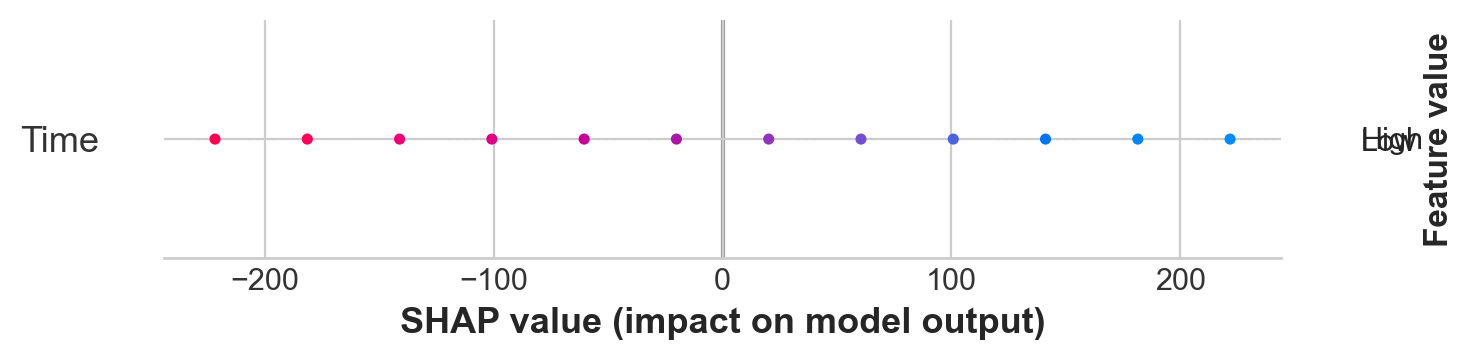

In [51]:
shap.summary_plot(shap_values, WaktuBerasPremium)

## Linear Regression

### Average Price of Medium Quality Rice

In [52]:
df2 = pd.read_csv("Data_Rata-Rata_Harga _Beras_Kualitas_Beras_Medium_2016.csv", parse_dates=["Month"])

df2 = df2.set_index("Month")

df2.head()

,Harga
Month,
January,9548.24
February,9621.70
March,9444.35
April,8958.89
May,8835.54


In [53]:
BerasMedium = df2.copy()

BerasMedium['Time'] = np.arange(len(df2.index))

BerasMedium.head()

,Harga,Time
Month,,
January,9548.24,0
February,9621.70,1
March,9444.35,2
April,8958.89,3
May,8835.54,4


In [54]:
WaktuBerasMedium = BerasMedium.loc[:, ['Time']]  # features
HargaBerasMedium = BerasMedium.loc[:, 'Harga']  # target

# Train the model
model2 = LinearRegression()
model2.fit(WaktuBerasMedium, HargaBerasMedium)

# Koefisien model
print ('Coefficients: ', model2.coef_)
print ('Intercept: ',model2.intercept_)

# Store the fitted values as a time series with the same time index as
# the training data
AvgPriceMedium_pred = pd.Series(model2.predict(WaktuBerasMedium), index=WaktuBerasMedium.index)

Coefficients:  [-47.11513986]
Intercept:  9365.759102564103


In [55]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(AvgPriceMedium_pred - HargaBerasMedium)))
print("Residual sum of squares (MSE): %.2f" % np.mean((AvgPriceMedium_pred - HargaBerasMedium) ** 2))
print("R2-score: %.2f" % r2_score(HargaBerasMedium , AvgPriceMedium_pred) )
errors_2 = abs(AvgPriceMedium_pred - HargaBerasMedium)
mape_2 = 100 * (errors_2 / HargaBerasMedium)
accuracy_2 = 100 - np.mean(mape_2)
print('Accuracy:', round(accuracy_2, 2), '%.') 

Mean absolute error: 179.04
Residual sum of squares (MSE): 40281.79
R2-score: 0.40
Accuracy: 98.04 %.


### Method Shap for Average Price of Medium Quality Rice

In [56]:
explainer2 = shap.LinearExplainer(model2, WaktuBerasMedium)
shap_values2 = explainer.shap_values(WaktuBerasMedium)

In [57]:
shap.force_plot(explainer2.expected_value, shap_values2, WaktuBerasMedium)

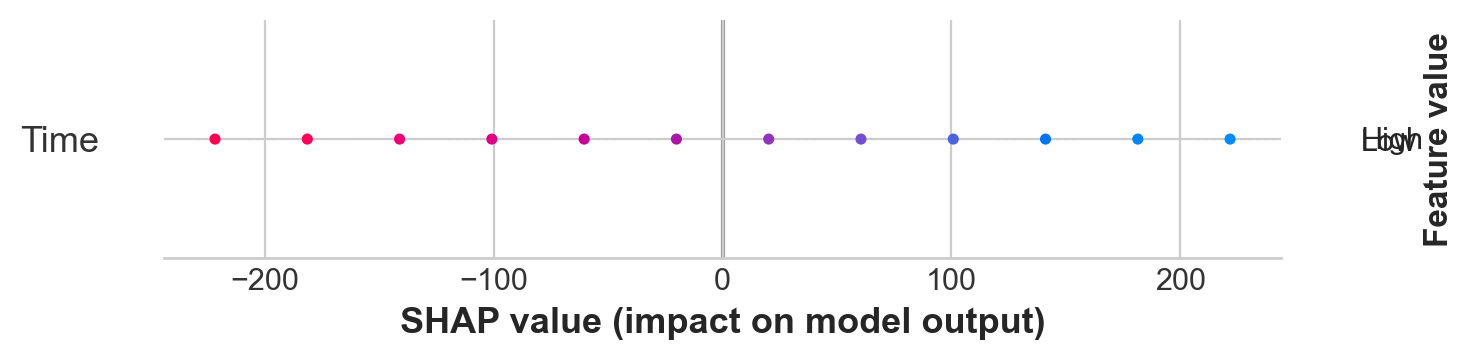

In [58]:
shap.summary_plot(shap_values2, WaktuBerasMedium)

## Linear Regression

### Average Price of Outside Quality Rice

In [59]:
df3 = pd.read_csv("Data_Rata-Rata_Harga _Beras_Kualitas_Beras_LuarKualitas_2016.csv", parse_dates=["Month"])

df3 = df3.set_index("Month")

df3.head()

,Harga
Month,
January,9280.39
February,9194.53
March,8995.32
April,8510.71
May,8488.49


In [60]:
BerasLuarkualitas = df3.copy()

BerasLuarkualitas['Time'] = np.arange(len(df3.index))

BerasLuarkualitas

,Harga,Time
Month,,
January,9280.39,0
February,9194.53,1
March,8995.32,2
April,8510.71,3
May,8488.49,4
June,8581.74,5
July,8557.50,6
August,8501.98,7
September,8577.60,8


In [61]:
WaktuBerasLuarkualitas = BerasLuarkualitas.loc[:, ['Time']]  # features
HargaBerasLuarkualitas = BerasLuarkualitas.loc[:, 'Harga']  # target

# Train the model
model3 = LinearRegression()
model3.fit(WaktuBerasLuarkualitas, HargaBerasLuarkualitas)

# Koefisien model
print ('Coefficients: ', model3.coef_)
print ('Intercept: ',model3.intercept_)

# Store the fitted values as a time series with the same time index as
# the training data
AvgPriceOutsideQuality_pred = pd.Series(model3.predict(WaktuBerasLuarkualitas), index=WaktuBerasLuarkualitas.index)

Coefficients:  [-50.15461538]
Intercept:  8990.492051282054


In [62]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(AvgPriceOutsideQuality_pred - HargaBerasLuarkualitas)))
print("Residual sum of squares (MSE): %.2f" % np.mean((AvgPriceOutsideQuality_pred - HargaBerasLuarkualitas) ** 2))
print("R2-score: %.2f" % r2_score(HargaBerasLuarkualitas , AvgPriceOutsideQuality_pred) )
errors_3 = abs(AvgPriceOutsideQuality_pred - HargaBerasLuarkualitas)
mape_3 = 100 * (errors_3 / HargaBerasLuarkualitas)
accuracy_3 = 100 - np.mean(mape_3)
print('Accuracy:', round(accuracy_3, 2), '%.') 

Mean absolute error: 178.31
Residual sum of squares (MSE): 41023.34
R2-score: 0.42
Accuracy: 97.96 %.


### Method Shap for Average Price of Outside Quality Rice

In [63]:
explainer3 = shap.LinearExplainer(model3, WaktuBerasLuarkualitas)
shap_values3 = explainer.shap_values(WaktuBerasLuarkualitas)

In [64]:
shap.force_plot(explainer3.expected_value, shap_values3, WaktuBerasLuarkualitas)

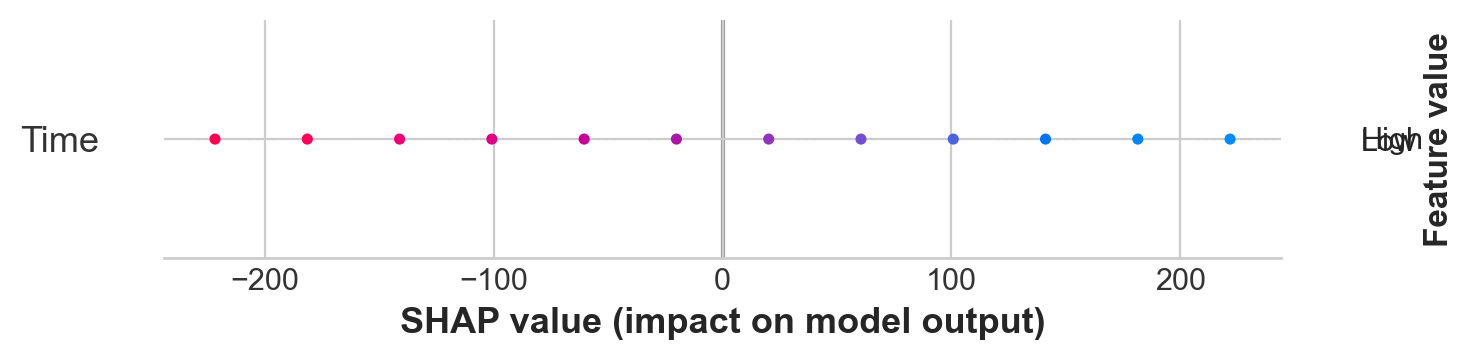

In [65]:
shap.summary_plot(shap_values3, WaktuBerasLuarkualitas)

### The difference

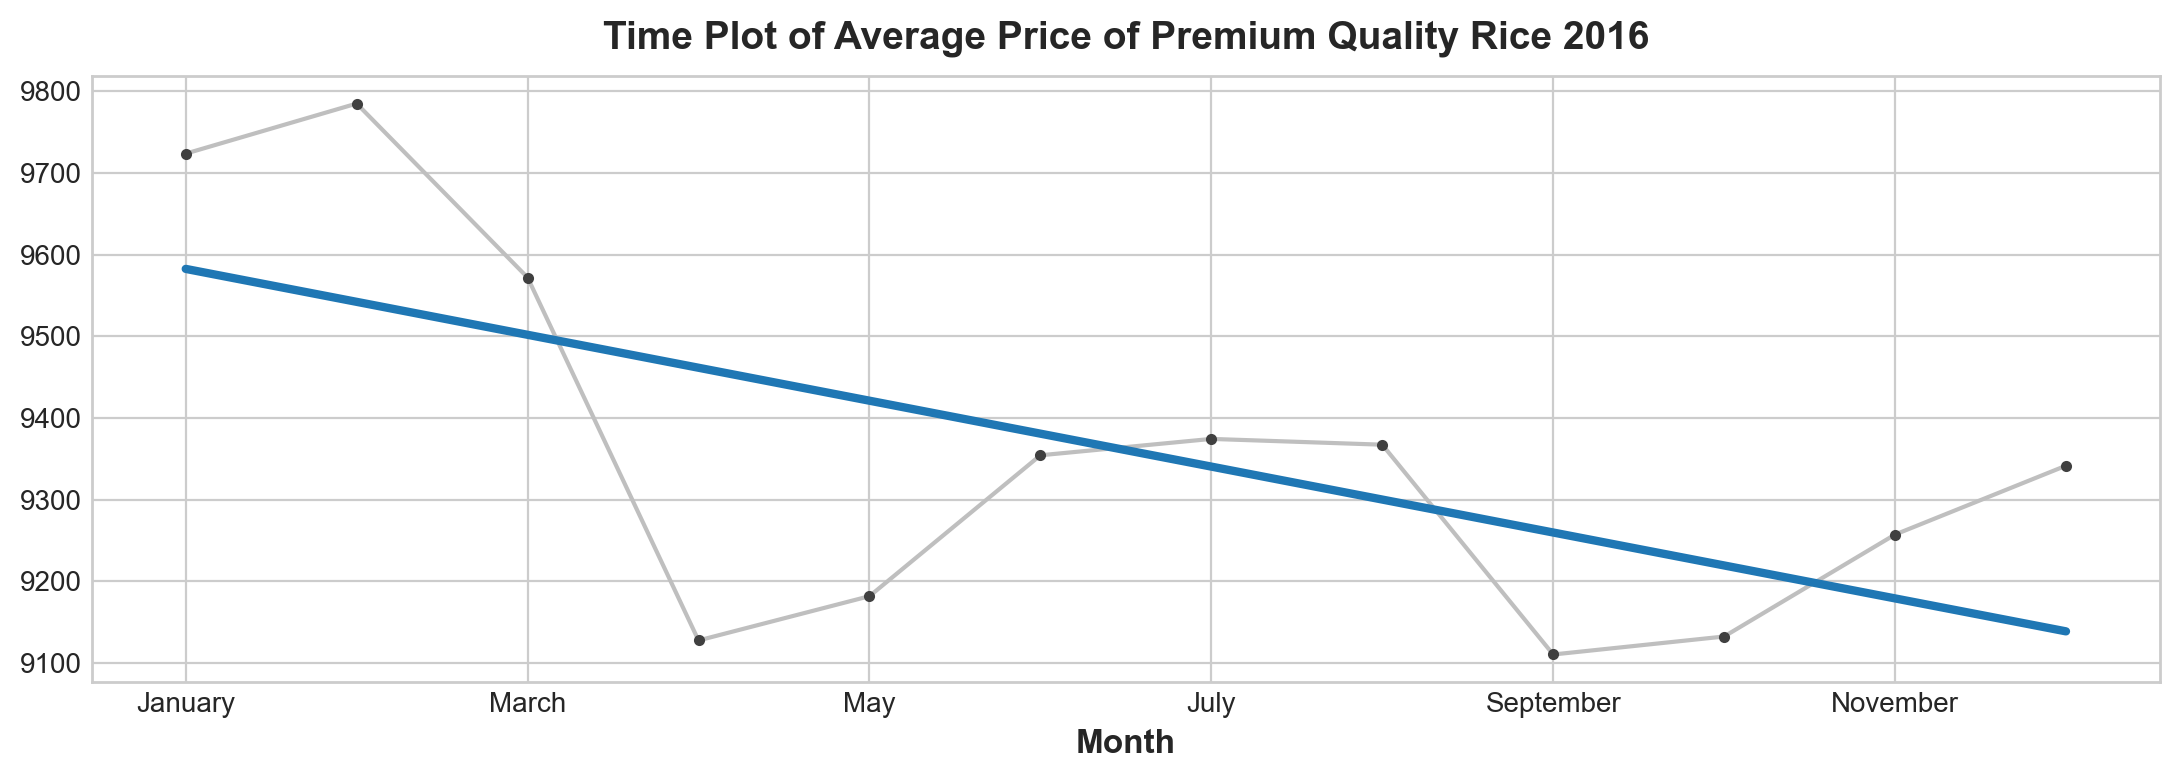

In [66]:
ax = HargaBerasPremium.plot(**plot_params)
ax = AvgPricePremium_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Average Price of Premium Quality Rice 2016');

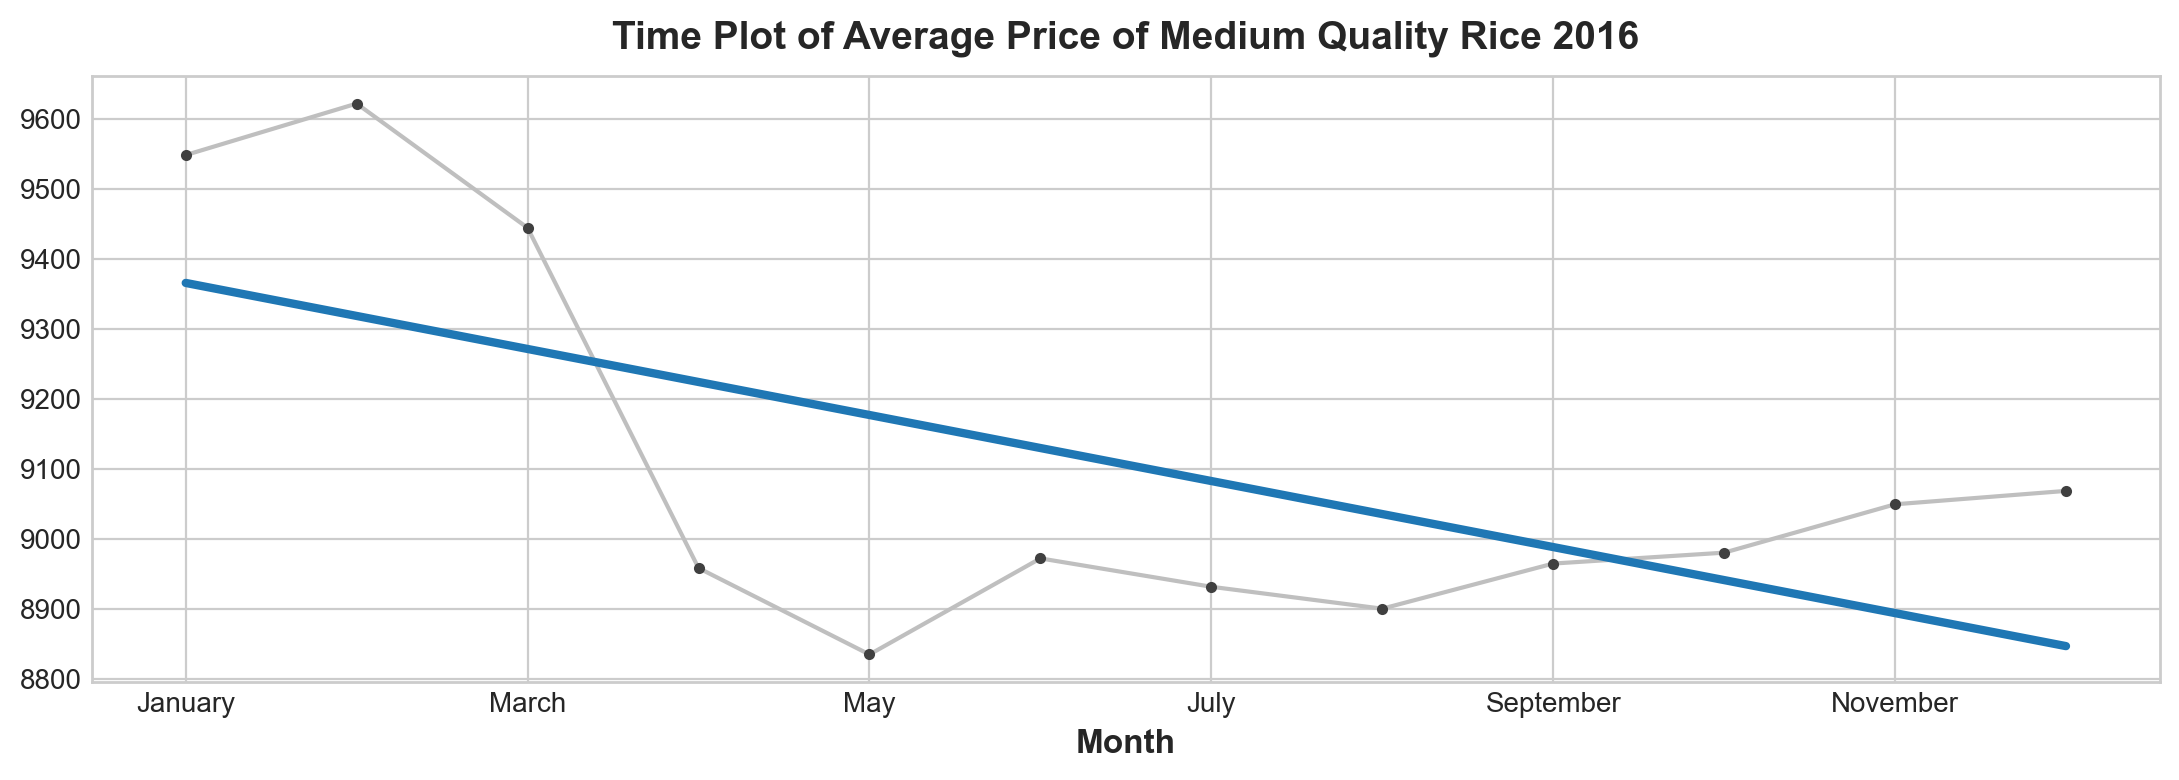

In [67]:
ax = HargaBerasMedium.plot(**plot_params)
ax = AvgPriceMedium_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Average Price of Medium Quality Rice 2016');

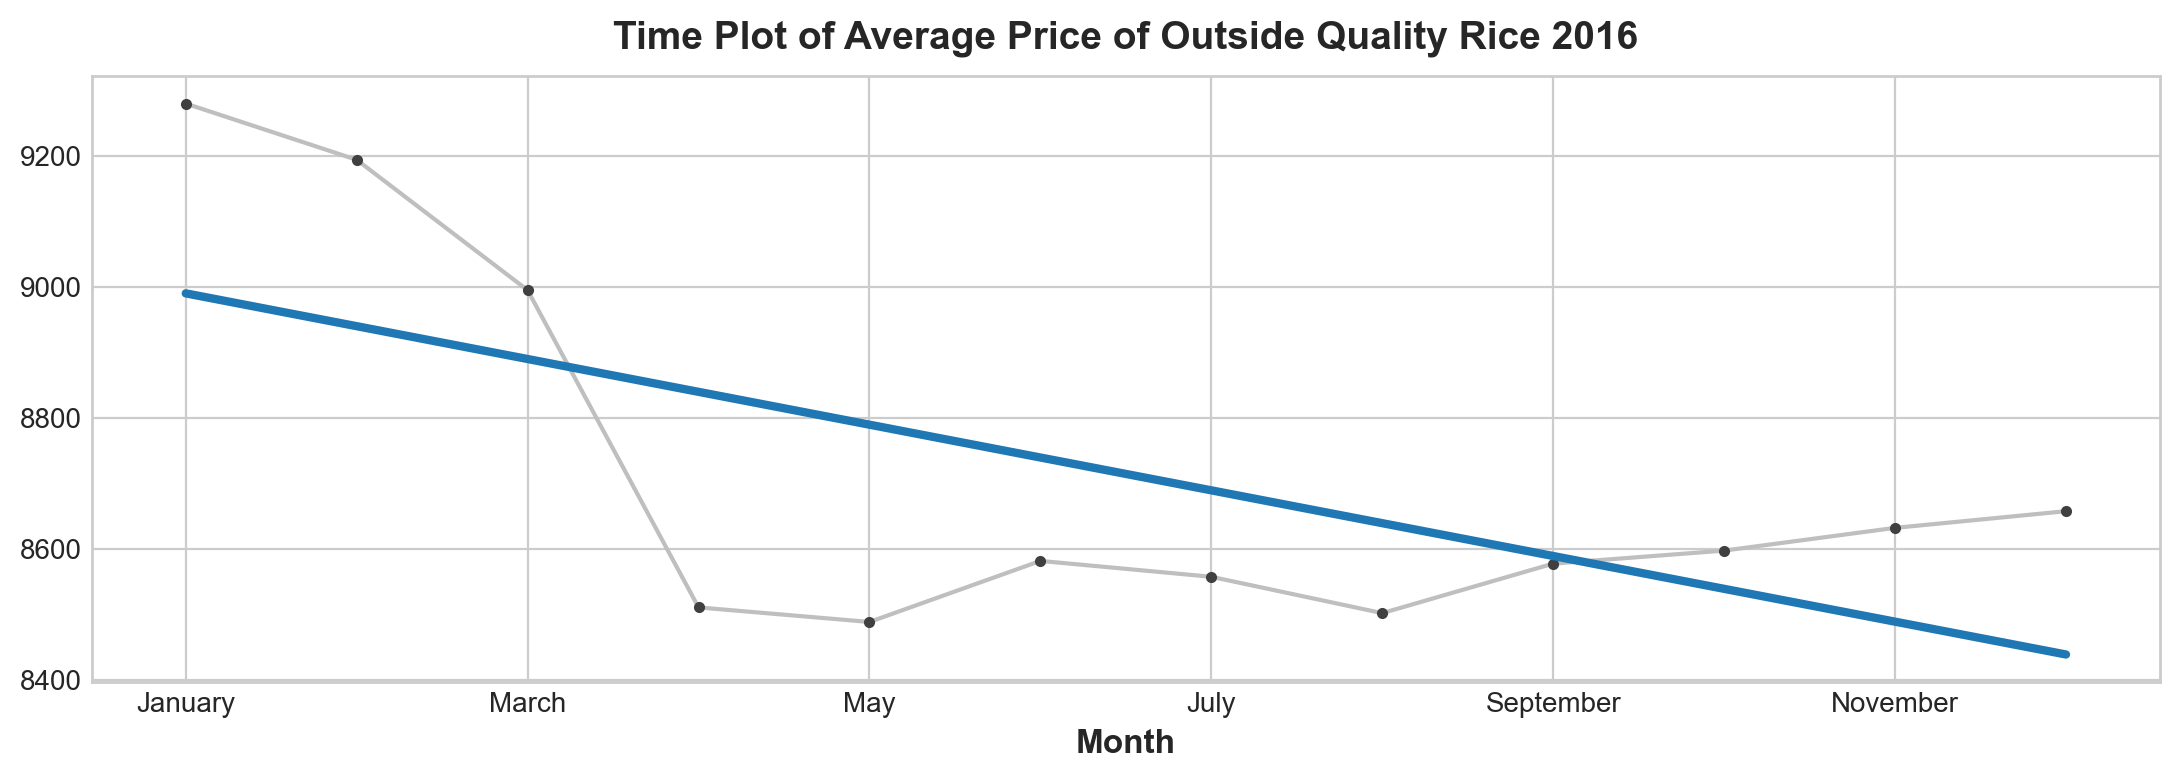

In [68]:
ax = HargaBerasLuarkualitas.plot(**plot_params)
ax = AvgPriceOutsideQuality_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Average Price of Outside Quality Rice 2016');

In [69]:
HargaBerasPremium

Month
January      9723.46
February     9784.70
March        9571.84
April        9127.77
May          9181.93
June         9354.34
July         9374.37
August       9367.30
September    9110.58
October      9132.58
November     9257.36
December     9341.58
Name: Harga, dtype: float64

In [70]:
AvgPricePremium_pred

Month
January      9582.407949
February     9542.088473
March        9501.768998
April        9461.449522
May          9421.130047
June         9380.810571
July         9340.491096
August       9300.171620
September    9259.852145
October      9219.532669
November     9179.213193
December     9138.893718
dtype: float64

In [71]:
HargaBerasMedium

Month
January      9548.24
February     9621.70
March        9444.35
April        8958.89
May          8835.54
June         8972.68
July         8932.18
August       8900.90
September    8965.31
October      8980.85
November     9049.87
December     9069.00
Name: Harga, dtype: float64

In [72]:
AvgPriceMedium_pred

Month
January      9365.759103
February     9318.643963
March        9271.528823
April        9224.413683
May          9177.298543
June         9130.183403
July         9083.068263
August       9035.953124
September    8988.837984
October      8941.722844
November     8894.607704
December     8847.492564
dtype: float64

In [73]:
HargaBerasLuarkualitas

Month
January      9280.39
February     9194.53
March        8995.32
April        8510.71
May          8488.49
June         8581.74
July         8557.50
August       8501.98
September    8577.60
October      8597.49
November     8632.24
December     8657.71
Name: Harga, dtype: float64

In [74]:
AvgPriceOutsideQuality_pred

Month
January      8990.492051
February     8940.337436
March        8890.182821
April        8840.028205
May          8789.873590
June         8739.718974
July         8689.564359
August       8639.409744
September    8589.255128
October      8539.100513
November     8488.945897
December     8438.791282
dtype: float64

# Random Forest

### Average Price of Premium Quality Rice

In [79]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [80]:
Beraspremium

,Harga,Time
Month,,
January,9723.46,0
February,9784.70,1
March,9571.84,2
April,9127.77,3
May,9181.93,4
June,9354.34,5
July,9374.37,6
August,9367.30,7
September,9110.58,8


In [81]:
# Training data
xVars = Beraspremium.loc[:, ['Time']]  # features
yVars = Beraspremium.loc[:, 'Harga']  # target

In [82]:
# Train the model
regressor = RandomForestRegressor(n_estimators = 1000, random_state=42)
regressor.fit(xVars, yVars)
predict = regressor.predict(xVars)
print(predict)
print(predict.shape)

[9703.09914 9728.26878 9581.69217 9250.46841 9195.69601 9310.54118
 9363.34973 9349.15126 9180.01827 9144.37101 9232.94363 9296.97719]
(12,)


In [83]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(yVars, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(yVars, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(yVars, predict)), 4))
print("R2-score: %.2f" % r2_score(yVars, predict) )
errors = abs(predict - yVars)
mape = 100 * (errors / yVars)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 37.1937
Mean Squared Error: 2404.6622
Root Mean Squared Error: 49.0374
R2-score: 0.95
Accuracy: 99.6 %.


In [84]:
AvgPricePremium_pred_with_randomforest = pd.Series(predict, index=xVars.index)

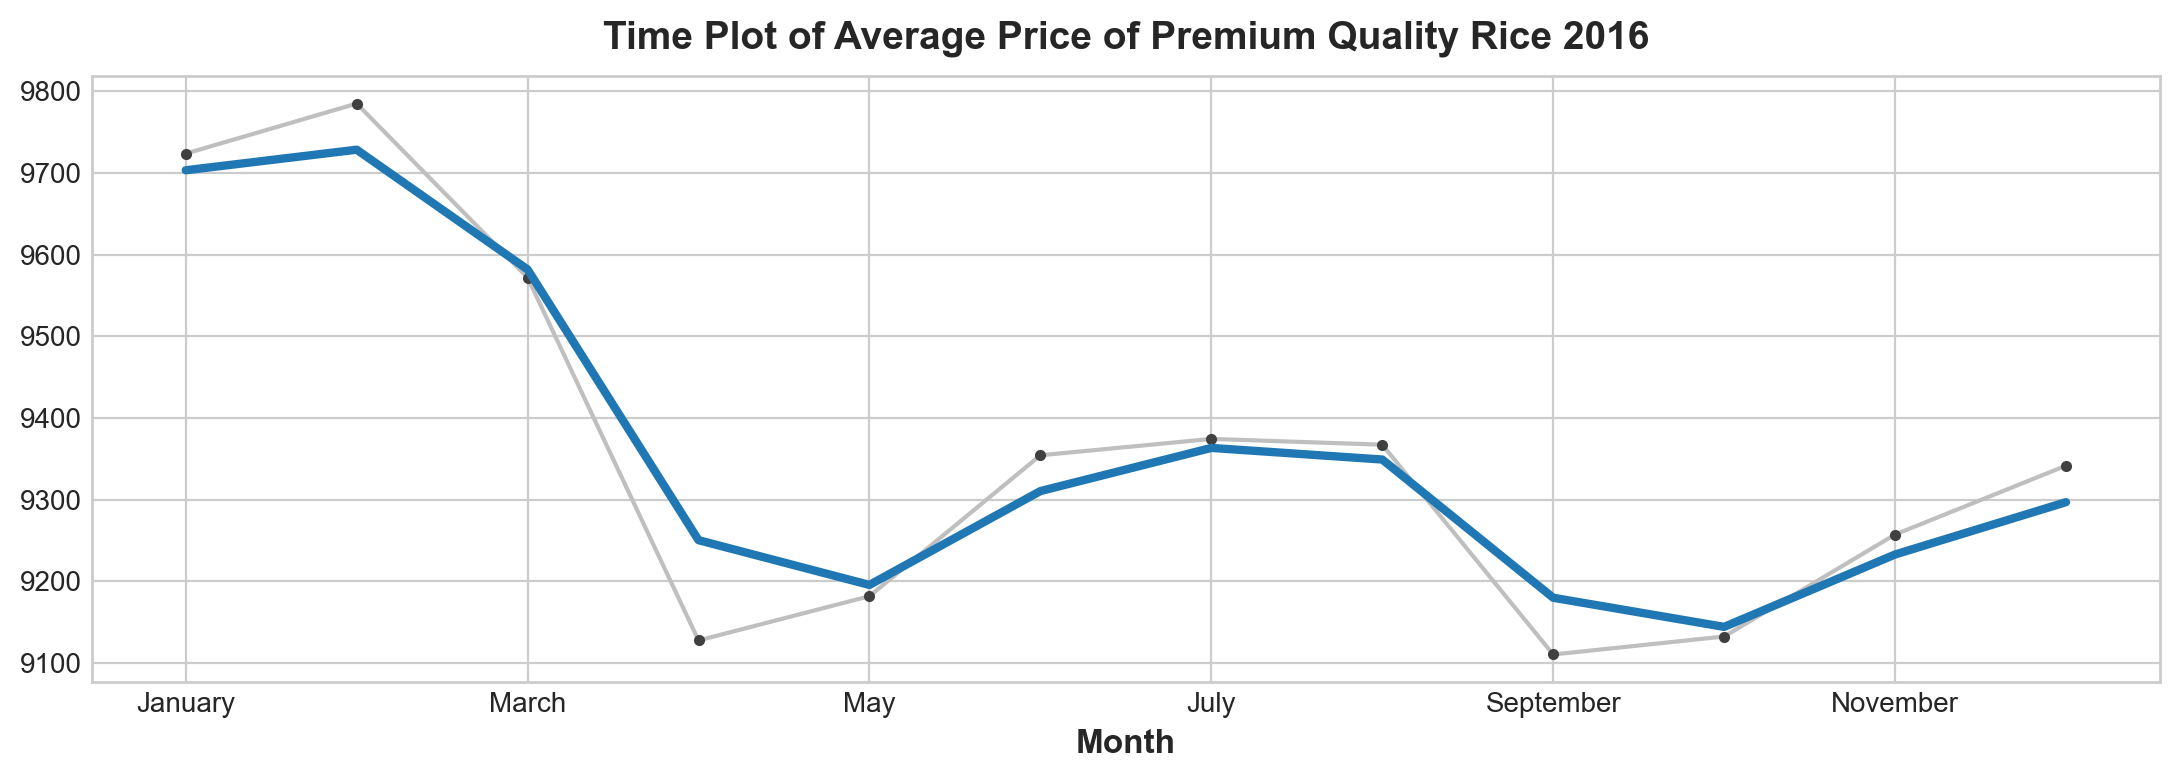

In [85]:
ax = yVars.plot(**plot_params)
ax = AvgPricePremium_pred_with_randomforest.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Average Price of Premium Quality Rice 2016');

In [100]:
yVars # the actual value of the average price of premium quality rice

Month
January      9723.46
February     9784.70
March        9571.84
April        9127.77
May          9181.93
June         9354.34
July         9374.37
August       9367.30
September    9110.58
October      9132.58
November     9257.36
December     9341.58
Name: Harga, dtype: float64

In [86]:
AvgPricePremium_pred_with_randomforest

Month
January      9703.09914
February     9728.26878
March        9581.69217
April        9250.46841
May          9195.69601
June         9310.54118
July         9363.34973
August       9349.15126
September    9180.01827
October      9144.37101
November     9232.94363
December     9296.97719
dtype: float64

In [97]:
# explain the model's predictions using SHAP
explainer4 = shap.TreeExplainer(regressor)
shap_values4 = explainer.shap_values(xVars)

In [96]:
shap.force_plot(explainer4.expected_value, shap_values4, xVars)

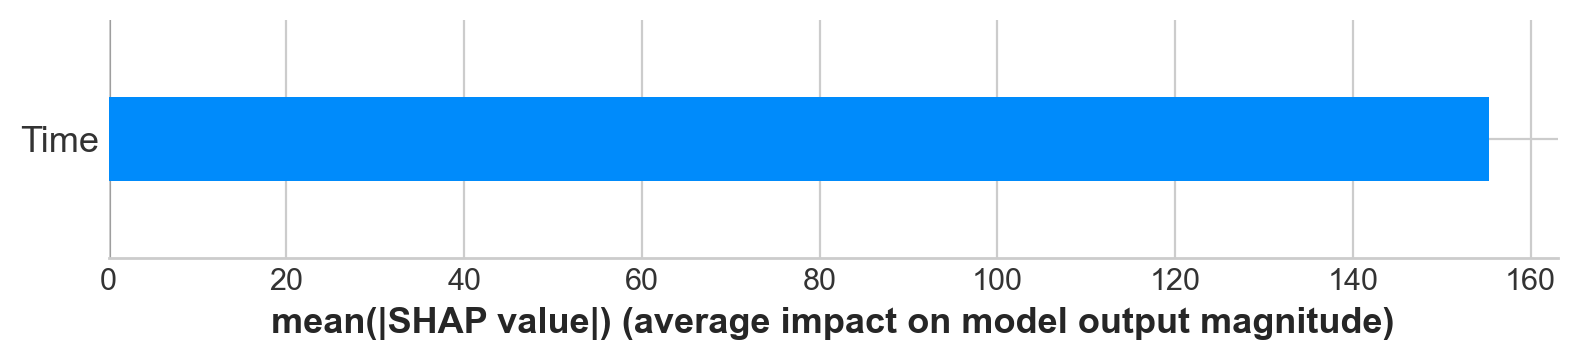

In [98]:
shap_values5 = shap.TreeExplainer(regressor).shap_values(xVars)
shap.summary_plot(shap_values5, xVars, plot_type="bar")

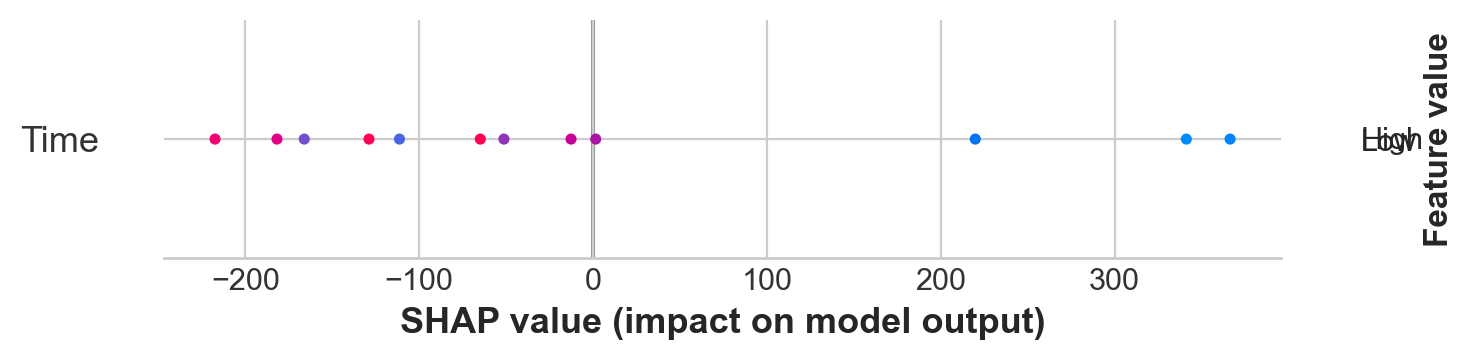

In [99]:
shap.summary_plot(shap_values5, xVars)

In [ ]:
MPE
data training 2013-2016
data test 2020-2022
1st data training 2017-2019
2 2016-2019
3 2013-2019